In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [3]:
features = ['id','cycle','setting1','setting2','setting3','s1','s2', 
            's3', 's4','s5', 's6',  's7', 's8', 's9','s10', 
            's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21','label_bnc']
datatrain = pd.read_csv('data/train.csv')
datatest = pd.read_csv('data/test.csv')


In [4]:
col_names = ['id','cycle','setting1','setting2','s2', 's3', 's4', 's6',  's7', 's8', 's9',
            's11', 's12', 's13', 's14', 's15',  's17',   's20', 's21','label_bnc']
data_train = datatrain[col_names]
data_test = datatest[col_names]

data_train.columns = col_names
data_test.columns = col_names

<AxesSubplot:>

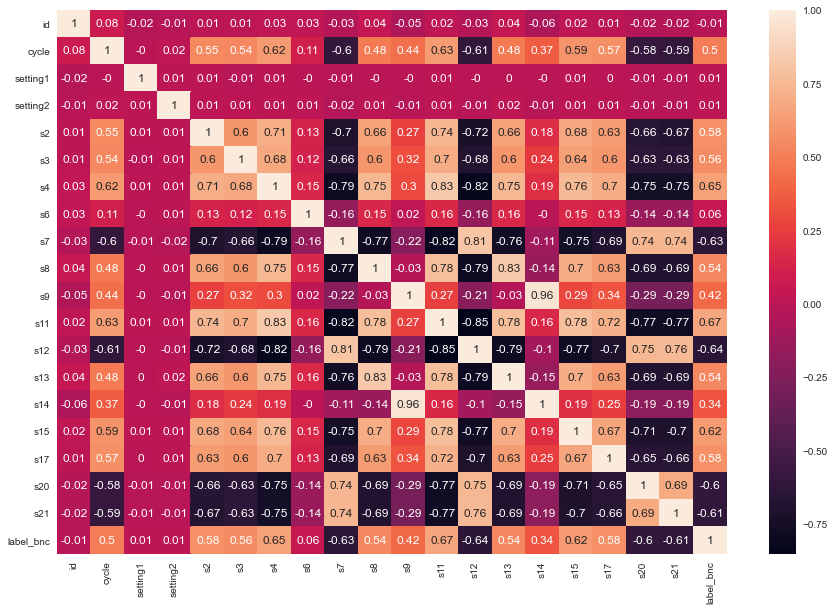

In [5]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = data_train.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, )

In [6]:
col_names_RUL = ['s2', 's3', 's4',   's7', 's8', 's9',
            's11', 's12', 's13',  's15',  's17',   's20', 's21']

In [7]:
# gán feature
X_train =data_train[col_names_RUL]
y_train = data_train['label_bnc']
X_test = data_test[col_names_RUL]
y_test = data_test['label_bnc']

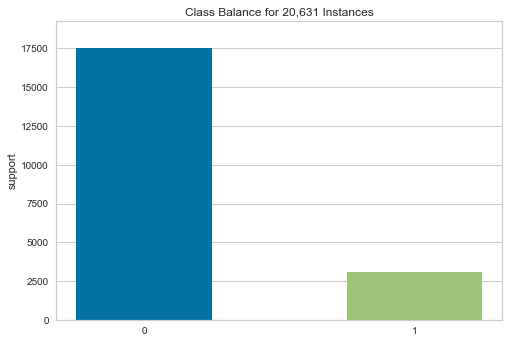

<AxesSubplot:title={'center':'Class Balance for 20,631 Instances'}, ylabel='support'>

In [10]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(y_train)
visualizer.poof()

In [11]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [13]:
df2 = pd.DataFrame({'thực': y_test, 'dự đoán': y_pred})
df2.head(25)

,thực,dự đoán
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [14]:
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 95.6 %
Accuracy on test set: 94.0 %
